## Adult income
https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

In [1]:
# imports

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import SimpleImputer, KNNImputer 

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from category_encoders import BinaryEncoder

from sklearn.preprocessing import OneHotEncoder

from imblearn.under_sampling import RandomUnderSampler

In [52]:
adult_df = pd.read_csv('adult.csv',na_values=['?'])
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## Understanding Data

In [3]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
# check dtypes
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# Describe Numerical columns

adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Describe Categorical columns

adult_df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [9]:
cat_cols = adult_df.select_dtypes(include='object').columns

for cat in cat_cols:
    print(f'{cat} has number of uniques :',adult_df[cat].nunique())
    print(f'{cat} has uniques :',adult_df[cat].unique())
    print(f"\n{'='*100}\n")

workclass has number of uniques : 8
workclass has uniques : ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


education has number of uniques : 16
education has uniques : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


marital-status has number of uniques : 7
marital-status has uniques : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation has number of uniques : 14
occupation has uniques : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


relationship has number of uniques : 6
relationship has uniques : ['Own-child' 'Husband' 'N

In [10]:
for cat in cat_cols:
    print(f"{cat} column Count of each unique")
    print(adult_df[cat].value_counts())
    print(f"\n{'='*100}\n")

workclass column Count of each unique
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


education column Count of each unique
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


marital-status column Count of each unique
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


occ

## EDA & Visualization

In [11]:
# no features to extract 

In [12]:
num_cols = adult_df.select_dtypes(include='number').columns
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

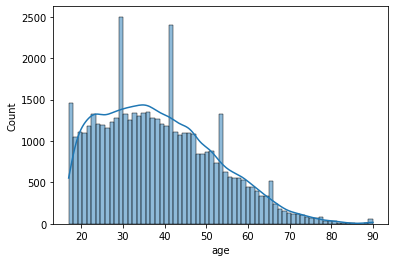

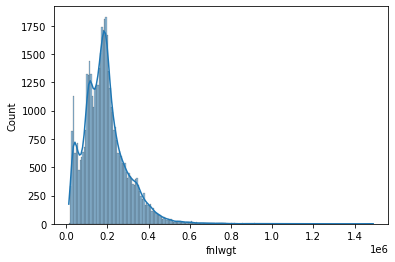

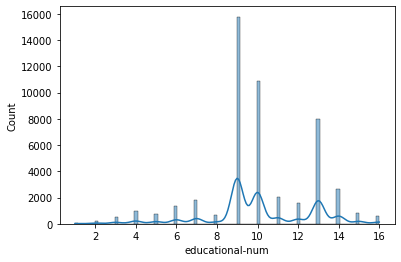

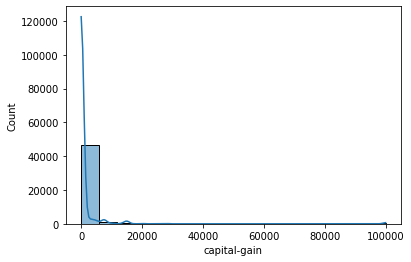

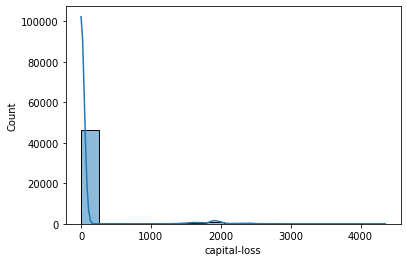

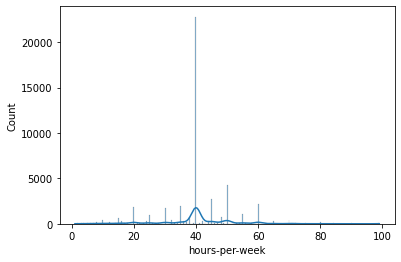

In [13]:
for col in num_cols :
    sns.histplot(adult[col],kde=True)
    plt.show()

In [14]:
workclass = pd.DataFrame(adult['workclass'].value_counts())
workclass
pd.DataFrame(adult['workclass'].value_counts())

,workclass
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [15]:
px.pie(workclass,names=workclass.index,title='WorkClass',values=workclass['workclass'].values
       ,height=500,width=500,hole=0.3,color_discrete_sequence=px.colors.plotlyjs.Portland)

<AxesSubplot:xlabel='workclass', ylabel='count'>

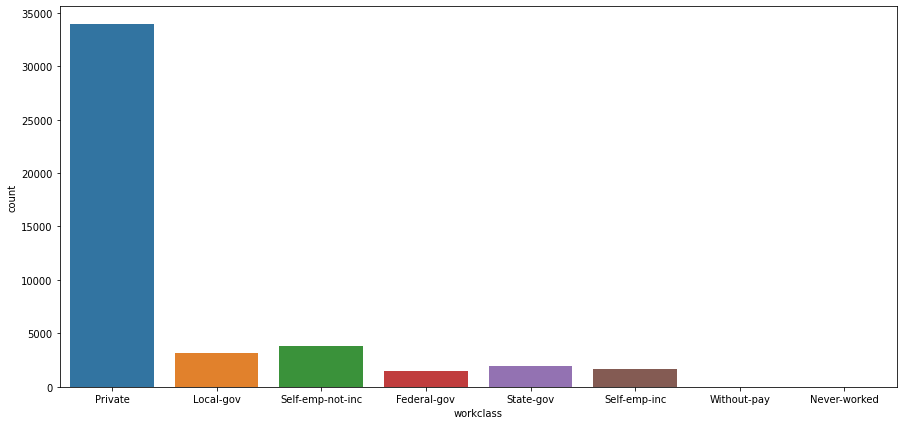

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(data=adult,x=adult['workclass'])

In [17]:
cat_cols = adult.select_dtypes('object').columns
for cat in cat_cols:
    print(cat,adult[cat].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
gender 2
native-country 41
income 2


In [18]:
for cat in cat_cols:
    if adult[cat].nunique() <= 8:
        data = pd.DataFrame(adult[cat].value_counts())
        fig = px.pie(data,names=data.index,title=cat,values=data[cat].values,height=500,width=500,hole=0.3,color_discrete_sequence=px.colors.plotlyjs.Portland)
        fig.show()

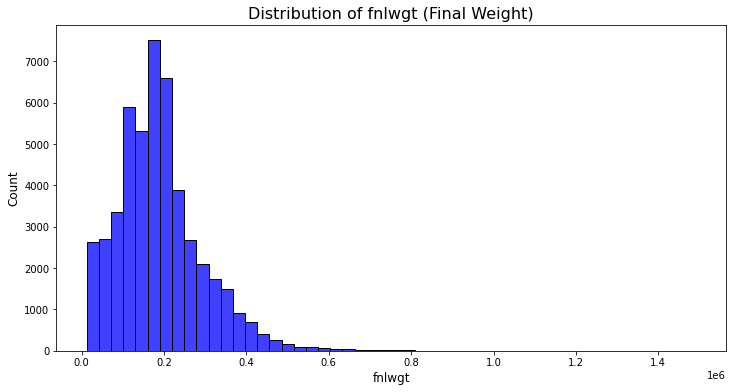

In [19]:
plt.figure(figsize=(12, 6))

# Plot a histogram for fnlwgt
sns.histplot(adult['fnlwgt'], bins=50, kde=False, color='blue')

# Add labels and title
plt.title('Distribution of fnlwgt (Final Weight)', fontsize=16)
plt.xlabel('fnlwgt', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

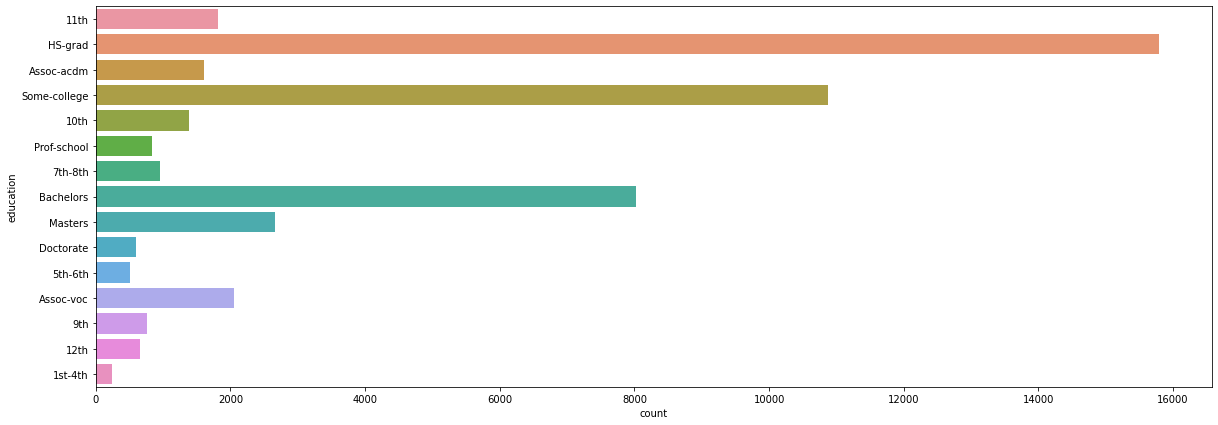

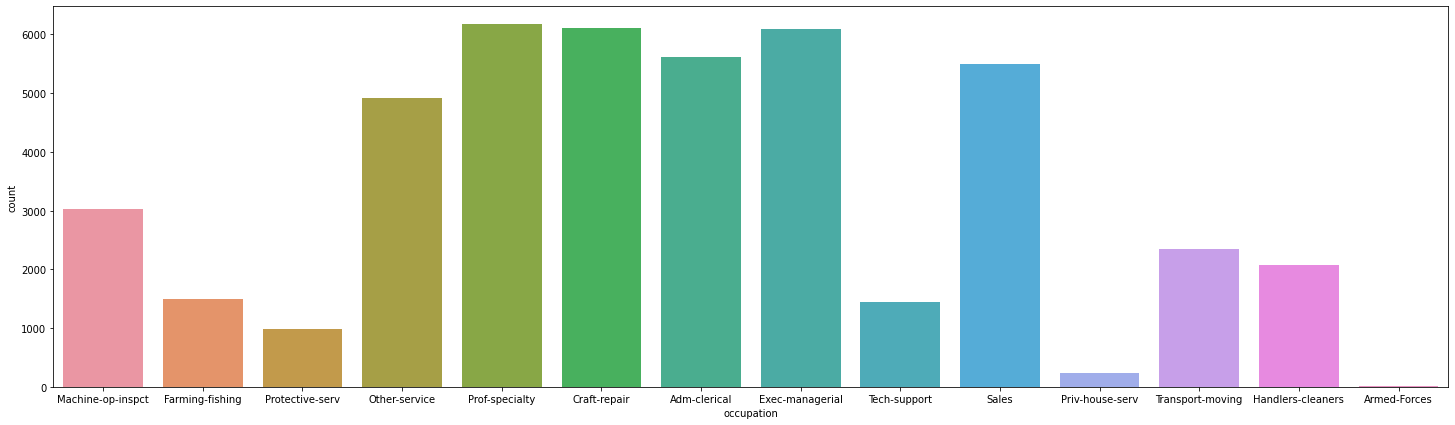

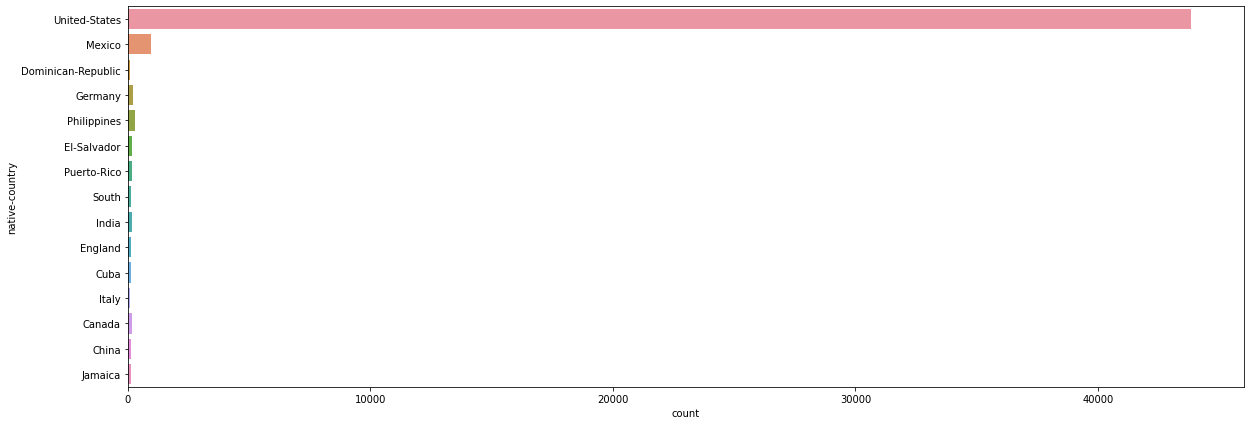

In [20]:
cat_cols = adult.select_dtypes(include='object').columns

for cat in cat_cols:
    if adult[cat].nunique() > 8 and adult[cat].nunique() <= 15:
        plt.figure(figsize=(25,7))
        sns.countplot(data=adult,x=adult[cat])
    elif adult[cat].nunique() > 15:
        plt.figure(figsize=(20,7))
        top_df = adult[cat].value_counts().head(15).index
        filter_df = adult[adult[cat].isin(top_df)]
        filter_df
        sns.countplot(data=filter_df,y=cat) 

In [21]:
adult_df = adult.select_dtypes('number')
adult_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [22]:
# correlation
adult.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<AxesSubplot:>

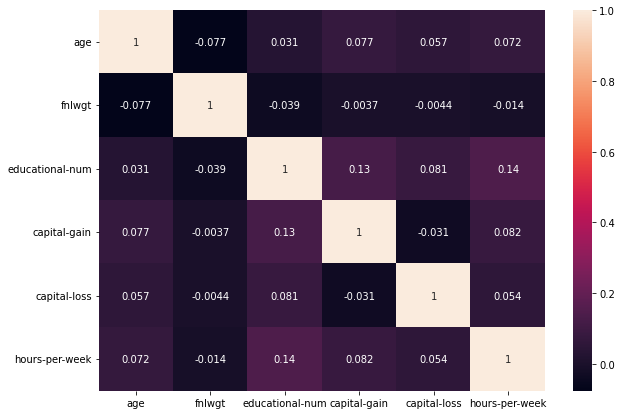

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(adult_df.corr(),annot=True)

In [24]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


#### count income for each workclass

In [25]:
adult.groupby(by= ['workclass','income'])[['age']].count().sort_values(by=['workclass','income'],ascending=False)

age
workclass        income       
Without-pay      >50K        2
                 <=50K      19
State-gov        >50K      530
                 <=50K    1451
Self-emp-not-inc >50K     1077
                 <=50K    2785
Self-emp-inc     >50K      938
                 <=50K     757
Private          >50K     7387
                 <=50K   26519
Never-worked     <=50K      10
Local-gov        >50K      927
                 <=50K    2209
Federal-gov      >50K      561
                 <=50K     871

In [26]:
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [27]:
adult.groupby(['native-country','income'])[['age']].count().sort_values(by=['native-country','income'],ascending=False)

age
native-country income       
Yugoslavia     >50K        8
               <=50K      15
Vietnam        >50K        7
               <=50K      79
United-States  >50K    10694
...                      ...
China          <=50K      86
Canada         >50K       63
               <=50K     119
Cambodia       >50K        9
               <=50K      19

[81 rows x 1 columns]

In [28]:
num_cols

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

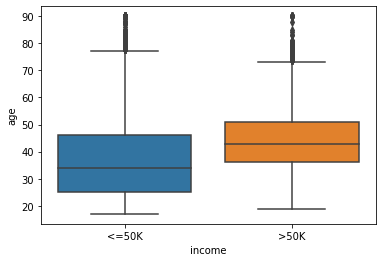

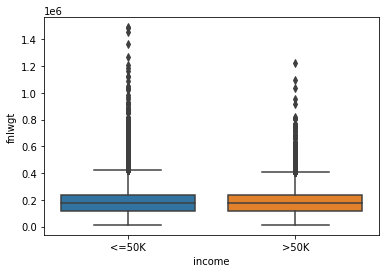

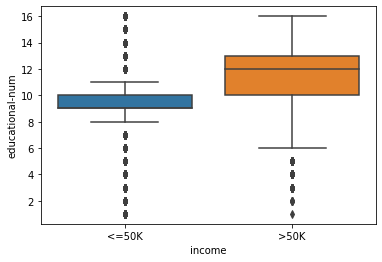

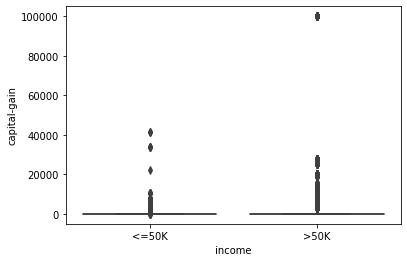

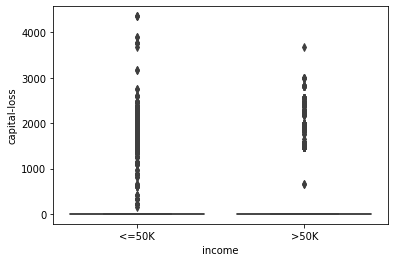

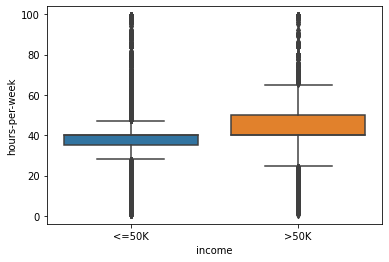

In [29]:
for col in num_cols:
    sns.boxplot(y=adult[col], x=adult["income"])
    plt.show()

#### Is there a significant difference in income between males and females?

In [30]:
adult.groupby(['gender','income'])[['age']].count().sort_values(by=['gender','income'],ascending=False)

age
gender income       
Male   >50K     9918
       <=50K   22732
Female >50K     1769
       <=50K   14423

<AxesSubplot:xlabel='gender', ylabel='count'>

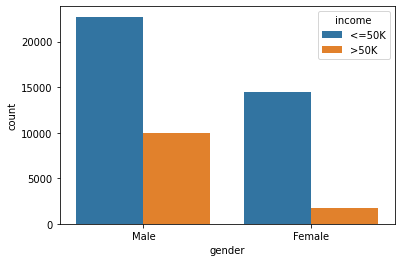

In [31]:
sns.countplot(data=adult,x='gender',hue='income')

#### How does the level of education impact income?

In [32]:
adult.groupby(['education','income'])[['age']].count().sort_values(by=['education','income'],ascending=False)

age
education    income       
Some-college >50K     2063
             <=50K    8815
Prof-school  >50K      617
             <=50K     217
Preschool    >50K        1
             <=50K      82
Masters      >50K     1459
             <=50K    1198
HS-grad      >50K     2503
             <=50K   13281
Doctorate    >50K      431
             <=50K     163
Bachelors    >50K     3313
             <=50K    4712
Assoc-voc    >50K      522
             <=50K    1539
Assoc-acdm   >50K      413
             <=50K    1188
9th          >50K       41
             <=50K     715
7th-8th      >50K       62
             <=50K     893
5th-6th      >50K       27
             <=50K     482
1st-4th      >50K        8
             <=50K     239
12th         >50K       48
             <=50K     609
11th         >50K       92
             <=50K    1720
10th         >50K       87
             <=50K    1302

<AxesSubplot:xlabel='education', ylabel='count'>

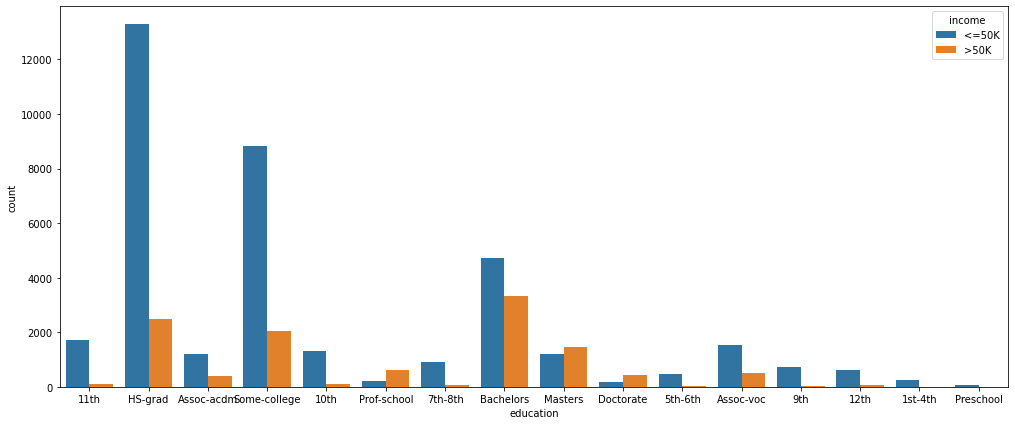

In [33]:
plt.figure(figsize=(17,7))
sns.countplot(data=adult,x='education' , hue='income')

#### Do race affect income?

In [34]:
adult.groupby(['race','income'])[['age']].count().sort_values(by=['race','income'],ascending=False)

age
race               income       
White              >50K    10607
                   <=50K   31155
Other              >50K       50
                   <=50K     356
Black              >50K      566
                   <=50K    4119
Asian-Pac-Islander >50K      409
                   <=50K    1110
Amer-Indian-Eskimo >50K       55
                   <=50K     415

<AxesSubplot:xlabel='race', ylabel='count'>

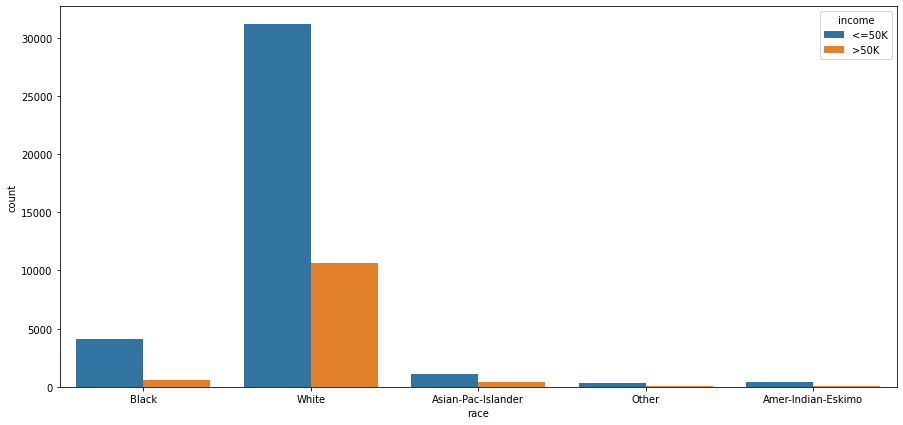

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(data=adult,x='race',hue='income')

#### Which occupations are most likely to yield a high income?

In [36]:
adult.groupby(['occupation','income'])[['age']].count().sort_values(by=['occupation','income'],ascending=False)

age
occupation        income      
Transport-moving  >50K     481
                  <=50K   1874
Tech-support      >50K     420
                  <=50K   1026
Sales             >50K    1475
                  <=50K   4029
Protective-serv   >50K     308
                  <=50K    675
Prof-specialty    >50K    2784
                  <=50K   3388
Priv-house-serv   >50K       3
                  <=50K    239
Other-service     >50K     204
                  <=50K   4719
Machine-op-inspct >50K     372
                  <=50K   2650
Handlers-cleaners >50K     138
                  <=50K   1934
Farming-fishing   >50K     173
                  <=50K   1317
Exec-managerial   >50K    2908
                  <=50K   3178
Craft-repair      >50K    1383
                  <=50K   4729
Armed-Forces      >50K       5
                  <=50K     10
Adm-clerical      >50K     768
                  <=50K   4843

<AxesSubplot:xlabel='occupation', ylabel='count'>

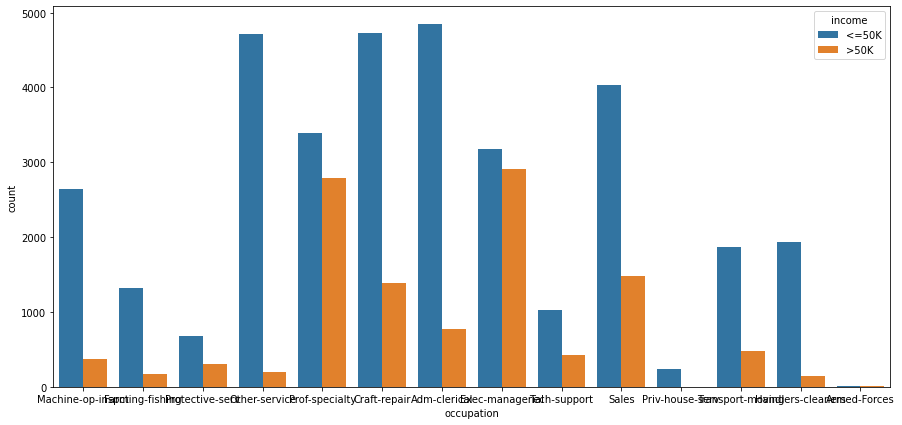

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(data=adult,x='occupation',hue='income')

In [38]:
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

#### Does marital status correlate with higher income?

In [39]:
adult.groupby(['marital-status','income'])[['age']].count().sort_values(by=['marital-status','income'],ascending=False)

age
marital-status        income       
Widowed               >50K      128
                      <=50K    1390
Separated             >50K       99
                      <=50K    1431
Never-married         >50K      733
                      <=50K   15384
Married-spouse-absent >50K       58
                      <=50K     570
Married-civ-spouse    >50K     9984
                      <=50K   12395
Married-AF-spouse     >50K       14
                      <=50K      23
Divorced              >50K      671
                      <=50K    5962

<AxesSubplot:xlabel='marital-status', ylabel='count'>

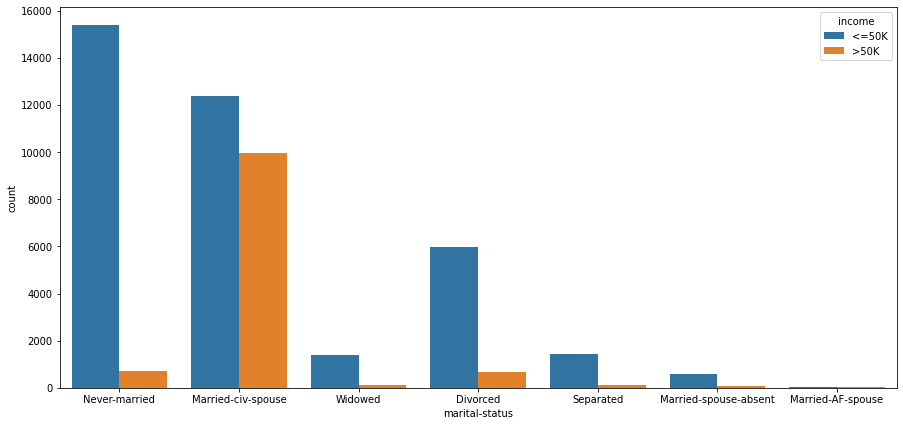

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(data=adult,x='marital-status',hue='income')

#### How does the country of origin affect income levels?

In [41]:
adult.groupby(['native-country','income'])[['age']].count().sort_values(by=['native-country','income'],ascending=False)

age
native-country income       
Yugoslavia     >50K        8
               <=50K      15
Vietnam        >50K        7
               <=50K      79
United-States  >50K    10694
...                      ...
China          <=50K      86
Canada         >50K       63
               <=50K     119
Cambodia       >50K        9
               <=50K      19

[81 rows x 1 columns]

<AxesSubplot:xlabel='count', ylabel='native-country'>

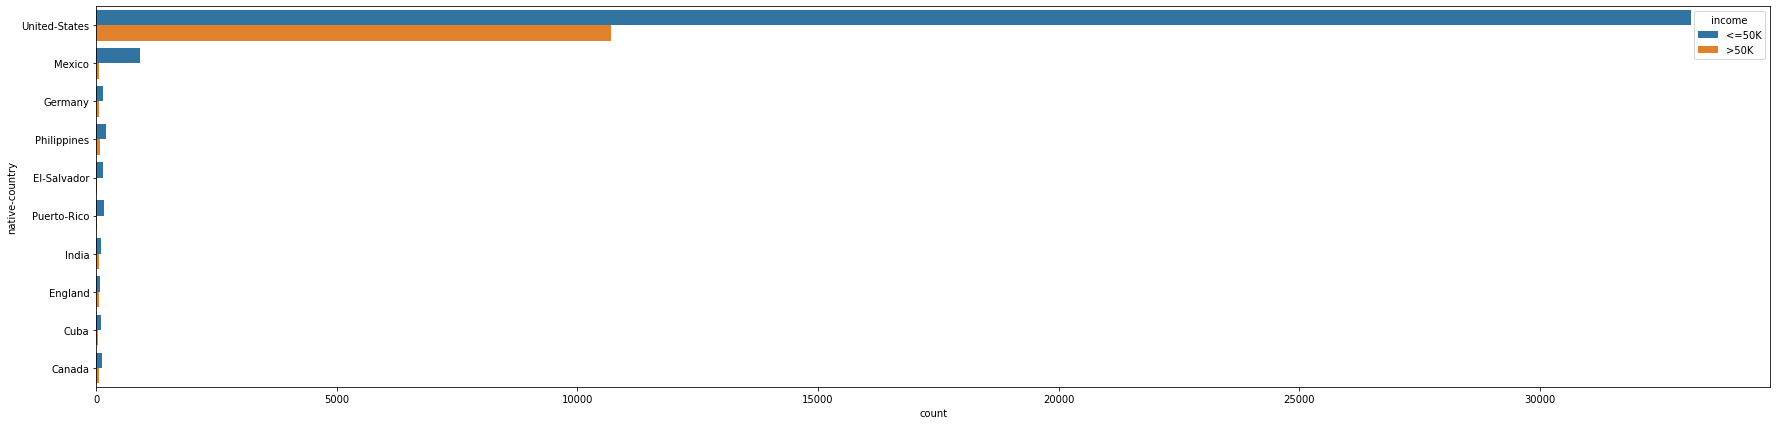

In [42]:
plt.figure(figsize=(30,7))
top_df = adult['native-country'].value_counts().head(10).index
filter_df = adult[adult['native-country'].isin(top_df)]
sns.countplot(data=filter_df,y='native-country',hue='income')

In [43]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### Does working more hours per week increase the chances of earning more than $50K?

In [44]:
adult.groupby(['hours-per-week','income'])[['age']].count().sort_values(by=['hours-per-week','income'],ascending=False)

age
hours-per-week income     
99             >50K     41
               <=50K    96
98             >50K      3
               <=50K    11
97             >50K      1
...                    ...
3              <=50K    56
2              >50K     12
               <=50K    41
1              >50K      3
               <=50K    24

[181 rows x 1 columns]

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

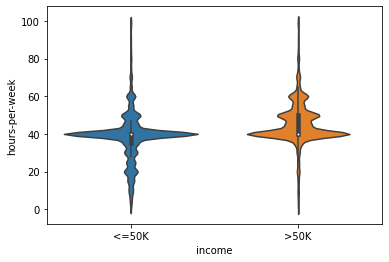

In [45]:
sns.violinplot(y=adult['hours-per-week'], x=adult["income"])

#### At what age do people generally start earning above $50K?

In [46]:
adult.groupby('income')[['age']].count().sort_values(by='age',ascending=False)

,age
income,
<=50K,37155
>50K,11687


<AxesSubplot:xlabel='income', ylabel='age'>

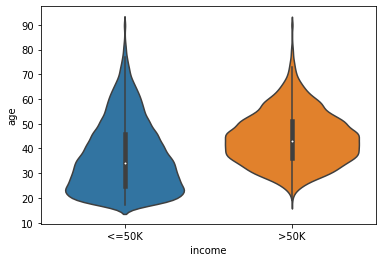

In [47]:
sns.violinplot(y=adult['age'], x=adult["income"])

In [48]:
adult.groupby(['fnlwgt','income'])[['age']].count().sort_values(by=['fnlwgt','income'],ascending=False)

age
fnlwgt  income     
1490400 <=50K     1
1484705 <=50K     1
1455435 <=50K     1
1366120 <=50K     1
1268339 <=50K     1
...             ...
13862   <=50K     1
13769   >50K      1
        <=50K     2
13492   <=50K     1
12285   <=50K     1

[32732 rows x 1 columns]

<AxesSubplot:xlabel='count', ylabel='fnlwgt'>

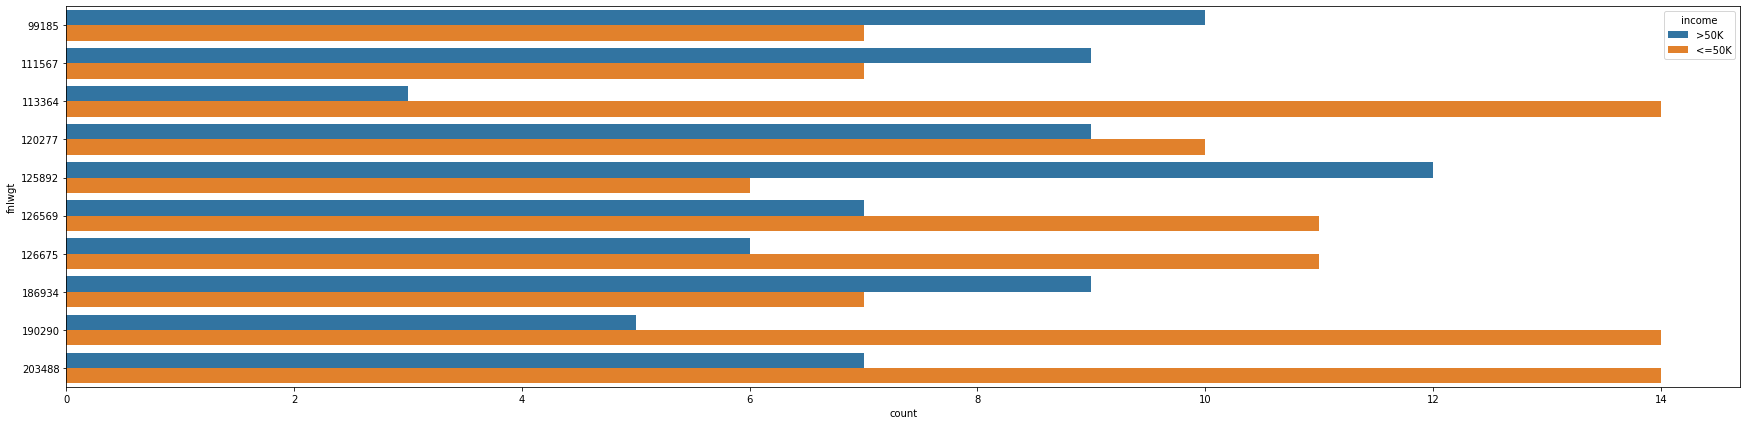

In [49]:
plt.figure(figsize=(30,7))
top_df = adult['fnlwgt'].value_counts().head(10).index
filter_df = adult[adult['fnlwgt'].isin(top_df)]
sns.countplot(data=filter_df,y='fnlwgt',hue='income')

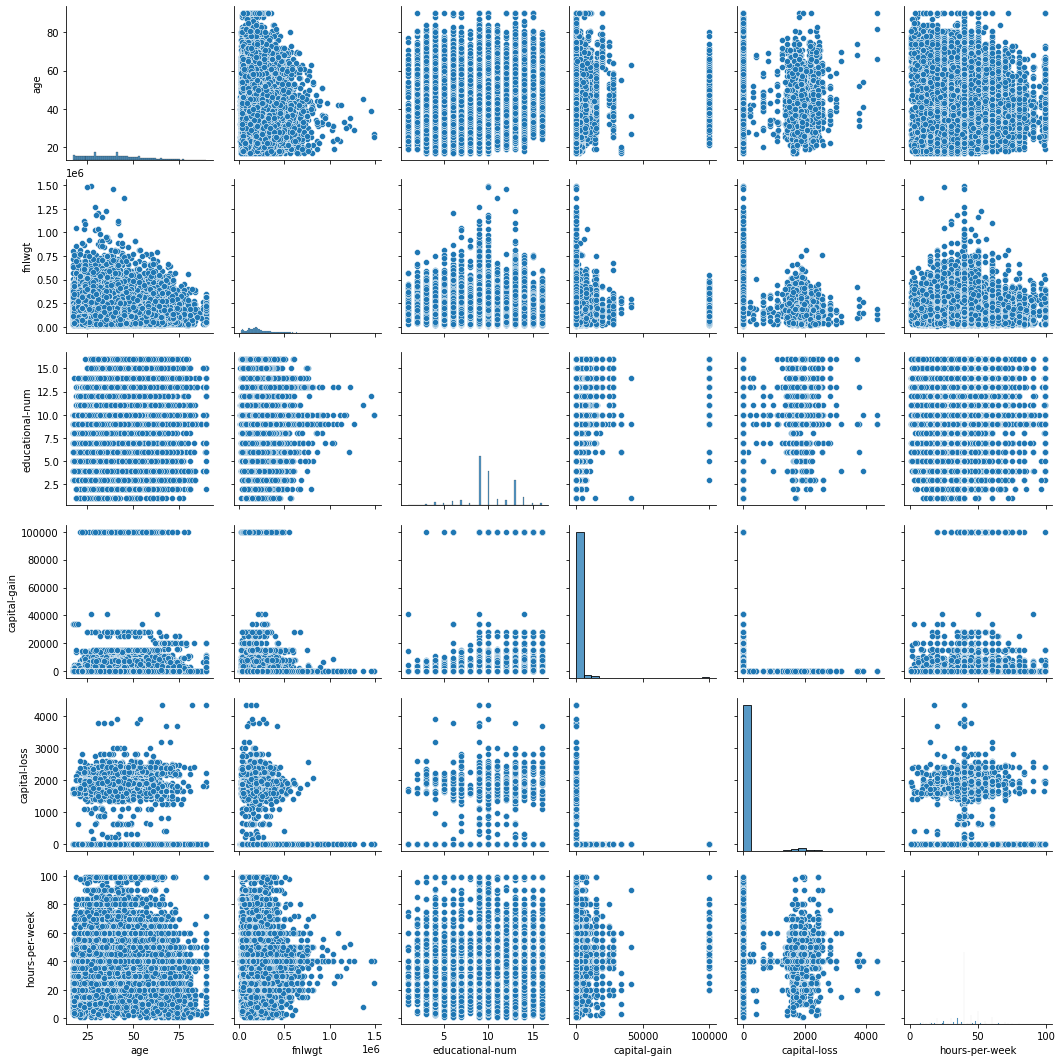

In [50]:
sns.pairplot(adult)

## Pre-Processing 

In [359]:
# detect NaNs 
adult_df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Detect & delete duplictaes

In [360]:
adult_df.duplicated().sum()

52

In [361]:
adult_df.drop_duplicates(inplace=True)
adult_df.reset_index(drop=True,inplace=True) # drop -> to avoid orginal index as a new column
adult_df.duplicated().sum()

0

In [362]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [363]:
# drop unnecessary columns ( education )
adult_df = adult_df.drop(columns=['education'],axis=1)
adult_df.shape

(48790, 14)

In [364]:
## detect duplicates again

adult_df.duplicated().sum()

0

## Train-test-split

In [365]:
X = adult_df.drop('income',axis=1)
y = adult_df['income']
X.shape , y.shape

((48790, 13), (48790,))

In [366]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,
                                                       shuffle=True
                                                       ,stratify = y,random_state=42) # random_state -> to split in the same way

In [367]:
X_test.shape

(9758, 13)

In [368]:
X_train.shape

(39032, 13)

In [369]:
y_train.shape

(39032,)

In [370]:
y_train.value_counts(normalize=True)

<=50K    0.760581
>50K     0.239419
Name: income, dtype: float64

In [371]:
y_test.value_counts(normalize=True)

<=50K    0.760607
>50K     0.239393
Name: income, dtype: float64

## Handle NaNs

* Train Data , Test Data

In [373]:
X_train.shape , X_test.shape

((39032, 13), (9758, 13))

In [374]:
X_train.isna().sum()

age                   0
workclass          2233
fnlwgt                0
educational-num       0
marital-status        0
occupation         2241
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      674
dtype: int64

In [375]:
(X_train.isna().sum() / X_train.shape[0]) * 100

age                0.000000
workclass          5.720947
fnlwgt             0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.741443
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.726788
dtype: float64

In [376]:
(X_test.isna().sum() / X_test.shape[0]) * 100

age                0.000000
workclass          5.759377
fnlwgt             0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.779873
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.865136
dtype: float64

In [377]:
# impute NaNs ('workclass' , 'occupation','native-country')

sm_imputer = SimpleImputer(strategy='most_frequent')
X_train[['workclass','occupation','native-country']] = sm_imputer.fit_transform(X_train[['workclass','occupation','native-country']])
X_test[['workclass','occupation','native-country']] = sm_imputer.transform(X_test[['workclass','occupation','native-country']])

In [378]:
(X_train.isna().sum() / X_train.shape[0]) * 100

age                0.0
workclass          0.0
fnlwgt             0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
dtype: float64

In [379]:
(X_test.isna().sum() / X_test.shape[0]) * 100

age                0.0
workclass          0.0
fnlwgt             0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
dtype: float64

## Outliers

* Train Data , Test Data

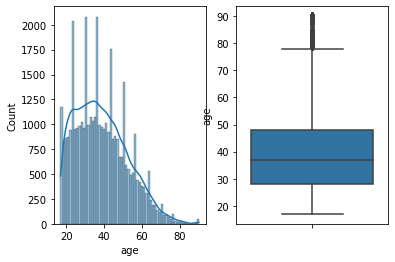

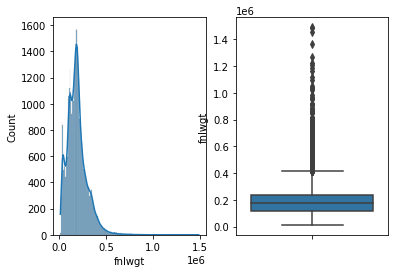

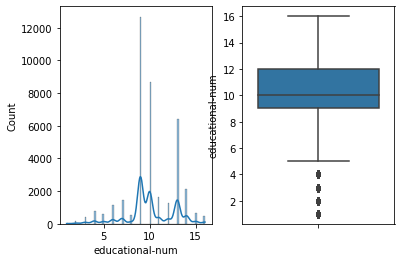

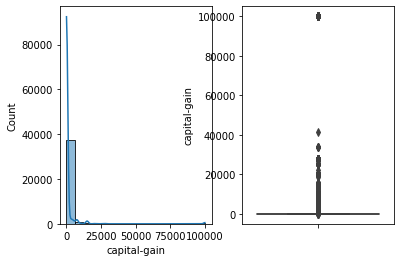

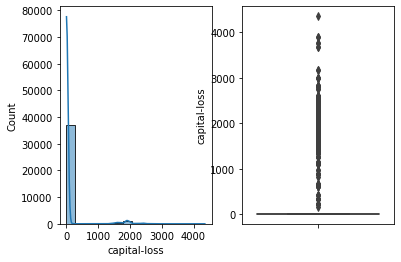

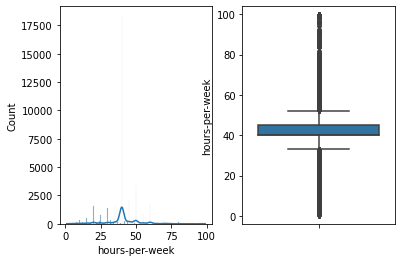

In [336]:
for col in num_cols :
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=X_train[col])
    plt.show()

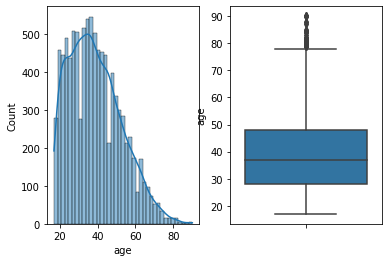

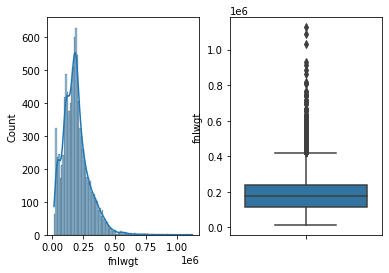

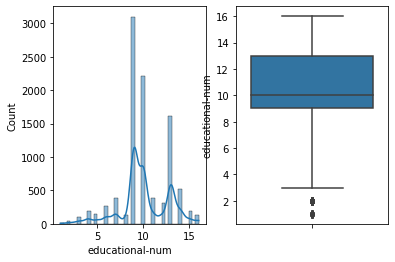

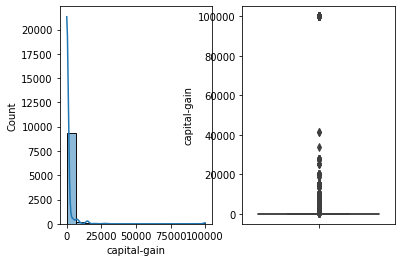

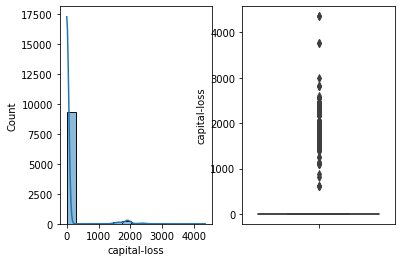

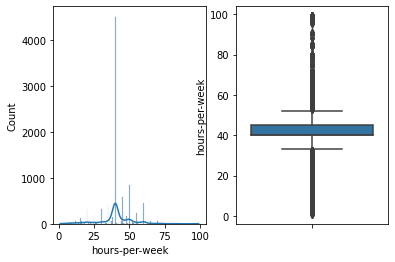

In [337]:
for col in num_cols :
    plt.subplot(1,2,1)
    sns.histplot(X_test[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=X_test[col])
    plt.show()

In [338]:
import warnings
import pandas as pd

# Correct way to suppress SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=pd.core.common.SettingWithCopyWarning)

<AxesSubplot:xlabel='age', ylabel='Count'>

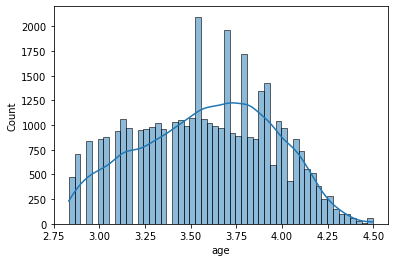

In [339]:
X_train['age'] = np.log(X_train['age'])
sns.histplot(X_train['age'],kde=True)

<AxesSubplot:ylabel='fnlwgt'>

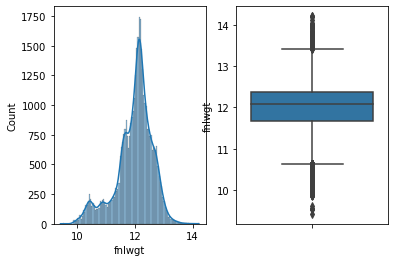

In [340]:
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])

plt.subplot(1,2,1)
sns.histplot(X_train['fnlwgt'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(y=X_train['fnlwgt'])

<AxesSubplot:xlabel='age', ylabel='Count'>

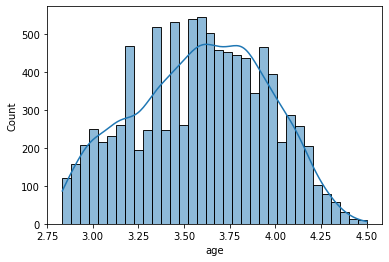

In [341]:
X_test['age'] = np.log(X_test['age'])
sns.histplot(X_test['age'],kde=True)

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

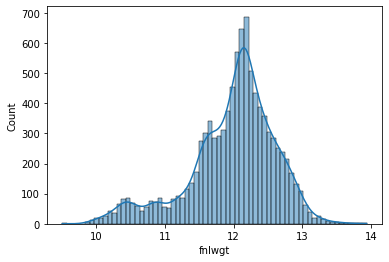

In [342]:
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])
sns.histplot(X_test['fnlwgt'],kde=True)

<AxesSubplot:ylabel='hours-per-week'>

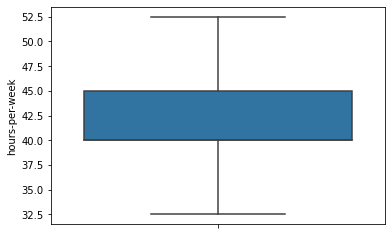

In [343]:
def handle_outliers_train(data):
    q1 = np.percentile(data,25)
    q2 = np.percentile(data,50)
    q3 = np.percentile(data,75)
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    data[data > ub ] = ub
    data[data < lb ] = lb
    return data , ub , lb

def handle_outliers_test(data,ub_train,lb_train):
    data[data > ub_train ] = ub_train
    data[data < lb_train ] = lb_train
    return data

X_train['hours-per-week'] , ub_train , lb_train = handle_outliers_train(X_train['hours-per-week'])

sns.boxplot(y=X_train['hours-per-week']) 

<AxesSubplot:ylabel='hours-per-week'>

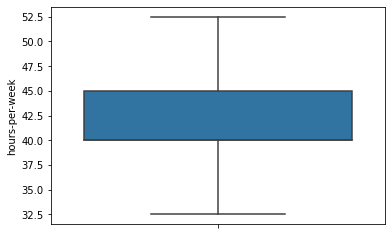

In [344]:
X_test['hours-per-week'] = handle_outliers_test(X_test['hours-per-week'],ub_train,lb_train)

sns.boxplot(y=X_test['hours-per-week']) 

<AxesSubplot:ylabel='educational-num'>

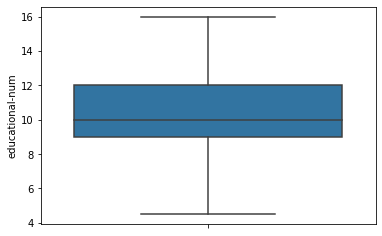

In [345]:
X_train['educational-num'] , ub_train , lb_train = handle_outliers_train(X_train['educational-num'])

sns.boxplot(y=X_train['educational-num']) 

<AxesSubplot:ylabel='educational-num'>

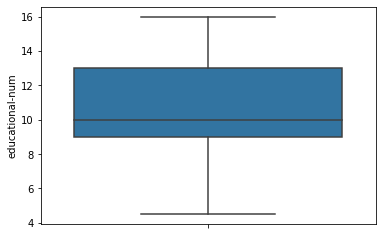

In [346]:
X_test['educational-num'] = handle_outliers_test(X_test['educational-num'],ub_train,lb_train)

sns.boxplot(y=X_test['educational-num']) 

In [347]:
# X_train['capital-gain'] = np.log1p(X_train['capital-gain'])
# sns.histplot(X_train['capital-gain'],kde=True)

In [348]:
# X_train['capital-loss'] = np.log1p(X_train['capital-loss'])
# sns.histplot(X_train['capital-loss'],kde=True)

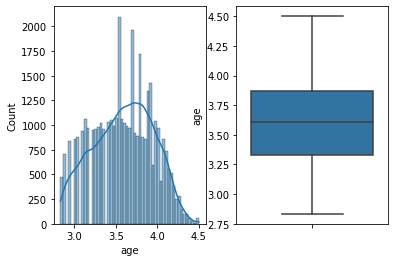

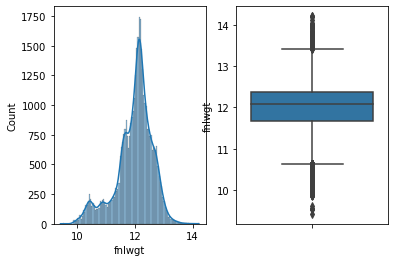

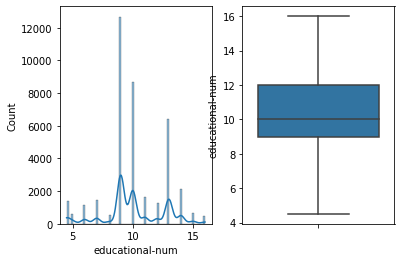

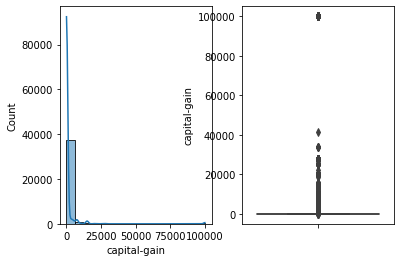

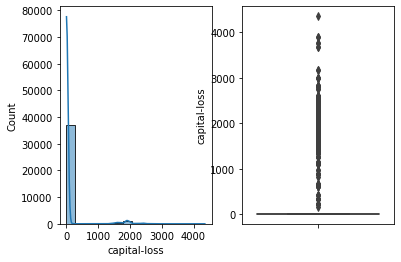

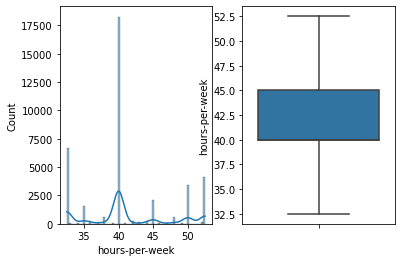

In [349]:
for col in num_cols :
    plt.subplot(1,2,1)
    sns.histplot(X_train[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=X_train[col])
    plt.show()

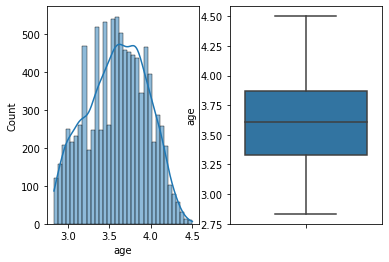

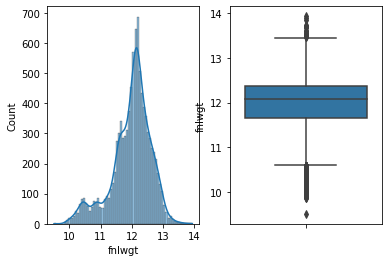

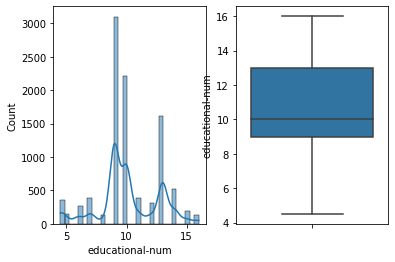

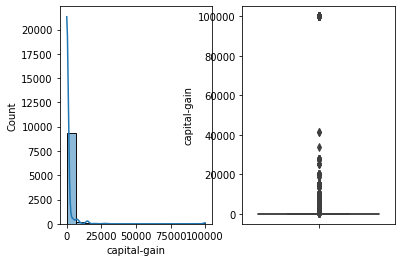

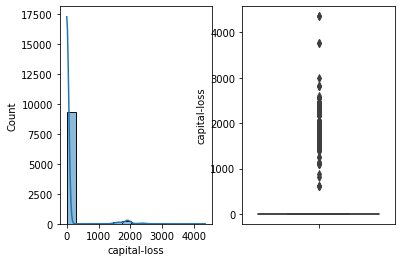

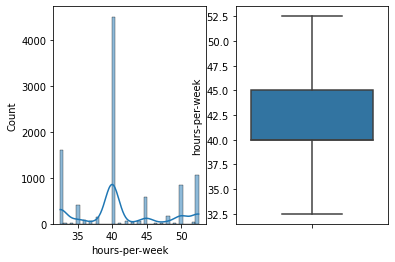

In [350]:
for col in num_cols :
    plt.subplot(1,2,1)
    sns.histplot(X_test[col],kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(y=X_test[col])
    plt.show()

## Encoding

* Train Data , Test Data

In [380]:
X_train.select_dtypes('object').head()

,workclass,marital-status,occupation,relationship,race,gender,native-country
13113,Self-emp-not-inc,Married-civ-spouse,Sales,Husband,White,Male,United-States
12054,State-gov,Never-married,Prof-specialty,Own-child,White,Female,United-States
41025,Local-gov,Never-married,Prof-specialty,Own-child,Black,Female,United-States
25013,Local-gov,Never-married,Handlers-cleaners,Other-relative,White,Male,United-States
4129,Private,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [381]:
b_encoder = BinaryEncoder()
b_encoder

BinaryEncoder()

In [382]:
X_train_cat = X_train.select_dtypes('O')
for cat in X_train_cat:
    print(cat, X_train[cat].nunique())
print('income',y_train.nunique())    

workclass 8
marital-status 7
occupation 14
relationship 6
race 5
gender 2
native-country 41
income 2


In [438]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')


encoding_train = ohe.fit_transform(X_train[['marital-status','relationship','race','gender']])
Cat_7_train = pd.DataFrame(encoding_train.toarray(),columns=ohe.get_feature_names())
Cat_7_train = pd.concat([Cat_7_train],axis=1)
Cat_7_train.reset_index(drop=True,inplace=True)
Cat_7_train

,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x1_Not-in-family,x1_Other-relative,x1_Own-child,x1_Unmarried,x1_Wife,x2_Asian-Pac-Islander,x2_Black,x2_Other,x2_White,x3_Male
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39027,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39028,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
39029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
39030,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [437]:
encoding_test = ohe.transform(X_test[['marital-status','relationship','race','gender']])
cat_7_test = pd.DataFrame(encoding_test.toarray(),columns=ohe.get_feature_names())
cat_7_test = pd.concat([cat_7_test],axis=1)
cat_7_test.reset_index(drop=True,inplace=True)
cat_7_test

,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x1_Not-in-family,x1_Other-relative,x1_Own-child,x1_Unmarried,x1_Wife,x2_Asian-Pac-Islander,x2_Black,x2_Other,x2_White,x3_Male
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9754,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9755,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9756,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [416]:
b_encoder = BinaryEncoder()
b_encoder

BinaryEncoder()

In [436]:
cat_8_train = b_encoder.fit_transform(X_train[['workclass','occupation','native-country']])
cat_8_train.reset_index(drop=True,inplace=True)
cat_8_train

,workclass_0,workclass_1,workclass_2,workclass_3,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,1,0,0,1,0,0,0,0,0,0,1
3,0,0,1,1,0,0,1,1,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39027,0,1,0,0,0,1,0,0,0,0,0,0,0,1
39028,0,1,0,0,1,0,0,1,0,0,0,0,0,1
39029,0,0,0,1,0,0,0,1,0,0,0,0,0,1
39030,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [439]:
cat_8_test = b_encoder.transform(X_test[['workclass','occupation','native-country']])
cat_8_test.reset_index(drop=True,inplace=True)
cat_8_test

,workclass_0,workclass_1,workclass_2,workclass_3,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0,1,0,0,0,1,0,1,1,0,0,0,0,0
1,0,0,0,1,1,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,1,1,1,0,0,0,0,0,0,0,1
4,0,0,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,0,0,0,1,0,0,1,0,0,0,0,0,0,1
9754,0,1,0,0,0,1,1,0,0,0,0,0,0,1
9755,0,1,0,0,0,0,1,0,0,0,0,0,0,1
9756,0,0,0,1,1,0,0,1,0,0,0,0,0,1


In [442]:
X_train_encoding = pd.concat([Cat_7_train,cat_8_train],axis=1)
X_train_encoding

,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x1_Not-in-family,x1_Other-relative,x1_Own-child,x1_Unmarried,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39027,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
39028,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
39029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
39030,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [443]:
X_test_encoding = pd.concat([cat_7_test,cat_8_test],axis=1)
X_test_encoding

,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,x0_Separated,x0_Widowed,x1_Not-in-family,x1_Other-relative,x1_Own-child,x1_Unmarried,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,1,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
9754,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,1
9755,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
9756,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1


In [411]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder

LabelEncoder()

In [412]:
y_encoder_train = l_encoder.fit_transform(y_train)
y_train_encoder = pd.DataFrame(y_encoder_train,columns=['income'])
y_train_encoder

c:\Users\Twins\.conda\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,income
0,1
1,0
2,0
3,0
4,1
...,...
39027,0
39028,1
39029,0
39030,0


In [413]:
y_encoder_test = l_encoder.transform(y_test)
y_test_encoder = pd.DataFrame(y_encoder_test,columns=['income'])
y_test_encoder

c:\Users\Twins\.conda\envs\MachineLearning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,income
0,0
1,0
2,0
3,0
4,1
...,...
9753,1
9754,0
9755,0
9756,0


In [414]:
y_train = pd.concat([y_train_encoder])
y_train

,income
0,1
1,0
2,0
3,0
4,1
...,...
39027,0
39028,1
39029,0
39030,0


In [415]:
y_test = pd.concat([y_test_encoder])
y_test

,income
0,0
1,0
2,0
3,0
4,1
...,...
9753,1
9754,0
9755,0
9756,0


In [444]:
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [445]:
cat_cols = cat_cols.drop(['income','education'])
cat_cols

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')

In [446]:
X_train.drop(cat_cols,axis=1,inplace=True)

In [448]:
X_train.reset_index(drop=True,inplace=True)

In [449]:
X_train

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,44,460259,13,0,0,50
1,22,125010,13,0,0,20
2,29,188909,13,0,0,42
3,22,134181,9,0,0,50
4,50,240374,14,0,0,50
...,...,...,...,...,...,...
39027,48,154430,13,0,0,35
39028,37,100508,9,0,0,40
39029,74,119129,9,0,2149,20
39030,45,370261,13,0,0,40


In [450]:
X_train = pd.concat([X_train,X_train_encoding],axis=1)
X_train

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,44,460259,13,0,0,50,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,22,125010,13,0,0,20,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
2,29,188909,13,0,0,42,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
3,22,134181,9,0,0,50,0.0,0.0,0.0,1.0,...,0,0,1,1,0,0,0,0,0,1
4,50,240374,14,0,0,50,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39027,48,154430,13,0,0,35,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
39028,37,100508,9,0,0,40,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
39029,74,119129,9,0,2149,20,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
39030,45,370261,13,0,0,40,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [451]:
X_test.drop(cat_cols,axis=1,inplace=True)

In [452]:
X_test.reset_index(drop=True,inplace=True)

In [453]:
X_test

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,34,149943,9,0,0,40
1,39,331481,13,0,1669,60
2,49,32212,9,0,0,43
3,63,159715,6,0,0,40
4,34,108247,10,0,0,45
...,...,...,...,...,...,...
9753,54,83311,15,0,0,30
9754,28,199903,13,0,0,20
9755,20,358355,8,0,0,35
9756,57,217692,9,0,0,38


In [454]:
X_test = pd.concat([X_test,X_test_encoding],axis=1)
X_test

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,34,149943,9,0,0,40,0.0,0.0,0.0,1.0,...,0,1,0,1,1,0,0,0,0,0
1,39,331481,13,0,1669,60,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
2,49,32212,9,0,0,43,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,63,159715,6,0,0,40,0.0,1.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
4,34,108247,10,0,0,45,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,54,83311,15,0,0,30,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
9754,28,199903,13,0,0,20,0.0,0.0,0.0,1.0,...,0,1,1,0,0,0,0,0,0,1
9755,20,358355,8,0,0,35,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
9756,57,217692,9,0,0,38,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1


In [455]:
X_train.shape , y_train.shape

((39032, 36), (39032, 1))

In [456]:
X_test.shape , y_test.shape

((9758, 36), (9758, 1))

## Imbalanced

In [458]:
y_train.value_counts()

income
0         29687
1          9345
dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

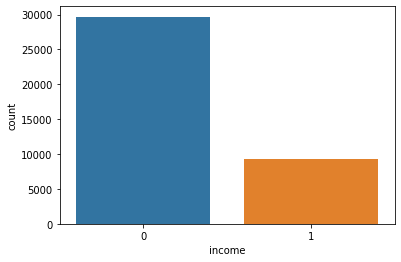

In [459]:
sns.countplot(x=y_train['income'])

In [462]:
# UnderSampling

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
under_sampler

RandomUnderSampler()

In [463]:
X_train_resampled , y_train_resampled = under_sampler.fit_resample(X = X_train , y=y_train)
X_train_resampled

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,46,230806,10,0,0,40,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
1,37,120045,9,0,0,56,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
2,26,386949,9,0,0,25,0.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,1
3,34,81206,9,0,0,40,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,1
4,58,175127,8,0,0,40,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18685,60,27886,10,0,0,40,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
18686,36,187847,13,7688,0,40,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
18687,42,167948,16,0,0,40,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,1
18688,27,228472,13,0,0,45,0.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1


In [464]:
y_train_resampled.value_counts()

income
1         9345
0         9345
dtype: int64

In [465]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf_model = DecisionTreeClassifier()
rf_model

DecisionTreeClassifier()

In [466]:
rf_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [467]:
from sklearn.metrics import accuracy_score
y_predict = rf_model.predict(X_train_resampled)

accuracy_score(y_train_resampled, y_predict)

0.9999464954521134

In [478]:
y_test_predict = rf_model.predict(X_test)

accuracy_score(y_test , y_test_predict)

0.6289198606271778

## Scaling

In [469]:
X_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
count,39032.000000,3.903200e+04,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,...,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000
mean,38.643651,1.897467e+05,10.075656,1090.038456,88.956958,40.416094,0.000717,0.457471,0.012784,0.330191,...,0.289173,0.437897,0.421218,0.436924,0.008788,0.028438,0.026056,0.044809,0.052905,0.962723
std,13.699454,1.057728e+05,2.565678,7558.611849,405.909421,12.393660,0.026774,0.498194,0.112344,0.470288,...,0.453384,0.496135,0.493761,0.496012,0.093331,0.166223,0.159303,0.206888,0.223847,0.189442
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.177670e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,1.782530e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,2.374690e+05,12.000000,0.000000,0.000000,45.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [471]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

std_scaler = StandardScaler()
X_train[['age','fnlwgt', 'hours-per-week']] = std_scaler.fit_transform(X_train[['age','fnlwgt', 'hours-per-week']])
X_test[['age','fnlwgt', 'hours-per-week']] = std_scaler.transform(X_test[['age','fnlwgt', 'hours-per-week']])

In [472]:
X_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
count,3.903200e+04,3.903200e+04,39032.000000,39032.000000,39032.000000,3.903200e+04,39032.000000,39032.000000,39032.000000,39032.000000,...,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000
mean,-2.912657e-18,1.547349e-17,10.075656,1090.038456,88.956958,3.240331e-17,0.000717,0.457471,0.012784,0.330191,...,0.289173,0.437897,0.421218,0.436924,0.008788,0.028438,0.026056,0.044809,0.052905,0.962723
std,1.000013e+00,1.000013e+00,2.565678,7558.611849,405.909421,1.000013e+00,0.026774,0.498194,0.112344,0.470288,...,0.453384,0.496135,0.493761,0.496012,0.093331,0.166223,0.159303,0.206888,0.223847,0.189442
min,-1.579912e+00,-1.677784e+00,1.000000,0.000000,0.000000,-3.180384e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.769498e-01,-6.805211e-01,9.000000,0.000000,0.000000,-3.357360e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-1.199809e-01,-1.086656e-01,10.000000,0.000000,0.000000,-3.357360e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.829811e-01,4.511828e-01,12.000000,0.000000,0.000000,3.698636e-01,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.748836e+00,1.229682e+01,16.000000,99999.000000,4356.000000,4.726986e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [476]:
from sklearn.metrics import accuracy_score
y_predict = rf_model.predict(X_train_resampled)

accuracy_score(y_train_resampled, y_predict)

0.9999464954521134

In [477]:
y_test_predict = rf_model.predict(X_test)

accuracy_score(y_test , y_test_predict)

0.6289198606271778

In [479]:
robust_scaler = RobustScaler()
X_train[['capital-gain','capital-loss']] = robust_scaler.fit_transform(X_train[['capital-gain','capital-loss']])
X_test[['capital-gain','capital-loss']] = robust_scaler.transform(X_test[['capital-gain','capital-loss']])

In [480]:
X_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
count,3.903200e+04,3.903200e+04,39032.000000,39032.000000,39032.000000,3.903200e+04,39032.000000,39032.000000,39032.000000,39032.000000,...,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000,39032.000000
mean,-2.912657e-18,1.547349e-17,10.075656,1090.038456,88.956958,3.240331e-17,0.000717,0.457471,0.012784,0.330191,...,0.289173,0.437897,0.421218,0.436924,0.008788,0.028438,0.026056,0.044809,0.052905,0.962723
std,1.000013e+00,1.000013e+00,2.565678,7558.611849,405.909421,1.000013e+00,0.026774,0.498194,0.112344,0.470288,...,0.453384,0.496135,0.493761,0.496012,0.093331,0.166223,0.159303,0.206888,0.223847,0.189442
min,-1.579912e+00,-1.677784e+00,1.000000,0.000000,0.000000,-3.180384e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.769498e-01,-6.805211e-01,9.000000,0.000000,0.000000,-3.357360e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-1.199809e-01,-1.086656e-01,10.000000,0.000000,0.000000,-3.357360e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.829811e-01,4.511828e-01,12.000000,0.000000,0.000000,3.698636e-01,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.748836e+00,1.229682e+01,16.000000,99999.000000,4356.000000,4.726986e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [481]:
from sklearn.metrics import accuracy_score
y_predict = rf_model.predict(X_train_resampled)

accuracy_score(y_train_resampled, y_predict)

0.9999464954521134

In [482]:
y_test_predict = rf_model.predict(X_test)

accuracy_score(y_test , y_test_predict)

0.6289198606271778

In [483]:
X_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,x0_Married-AF-spouse,x0_Married-civ-spouse,x0_Married-spouse-absent,x0_Never-married,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0.390995,2.557516,13,0.0,0.0,0.773301,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,-1.214929,-0.612043,13,0.0,0.0,-1.647323,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
2,-0.703953,-0.007920,13,0.0,0.0,0.127801,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
3,-1.214929,-0.525337,9,0.0,0.0,0.773301,0.0,0.0,0.0,1.0,...,0,0,1,1,0,0,0,0,0,1
4,0.828974,0.478648,14,0.0,0.0,0.773301,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [484]:
X_train.to_csv("cleaned_data/X_train_scaled.csv")
X_test.to_csv("cleaned_data/X_test_scaled.csv")
y_train.to_csv("cleaned_data/y_train.csv")
y_test.to_csv("cleaned_data/y_test.csv")